In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Note about this activity:

This notebook has two parts. In the first part, we will provide a simple pandas tutorial, to get you familiarized with this new library. Read it carefully, evaluate cells, make sure you understand the results. We will go over some important steps when dealing with large data sets.

We will use pandas to solve the second part of this GA, as well as the upcoming GAs and lecture demos.


## 1) Simple Pandas Example

This example creates a pandas dataframe from a dictionary:

In [66]:
data_set = {'first_name': ['Sarah', 'Gueniva', 'Know', 'Sara', 'Cat'], 
        'last_name': ['Mornig', 'Jaker', 'Alom', 'Ormon', 'Koozer'], 
        'age': [53, 26, 72, 73, 24]}
df = pd.DataFrame(data_set, columns = ['first_name', 'last_name', 'age'])

Now that we have loaded the data, let's take a look at what it looks like

In [ ]:
df

,first_name,last_name,age
0,Sarah,Mornig,53
1,Gueniva,Jaker,26
2,Know,Alom,72
3,Sara,Ormon,73
4,Cat,Koozer,24


We can take a look at some properties of this data:

In [68]:
# check the type
type(df)

pandas.core.frame.DataFrame

In [69]:
# check the shape
df.shape

(5, 3)

In Pandas, indexing a dataframe primarily works similarly to indexing a dictionary where the keys are the column labels.
We can access the column labels with `df.columns`, and use the attribute `df.columns.values` to have the labels as a numpy array.

In [70]:
df.columns

Index(['first_name', 'last_name', 'age'], dtype='object')

In [71]:
df.columns.values

array(['first_name', 'last_name', 'age'], dtype=object)

Using the header labels, we can access all the rows in a specific column using `df['label']`, for example:

In [72]:
df['age']

0    53
1    26
2    72
3    73
4    24
Name: age, dtype: int64

If we want to filter our dataset based on a specific values of a column, or logical conditions, we can use boolean expressions. Check the following:

In [75]:
df['age'] < 30

0    False
1     True
2    False
3    False
4     True
Name: age, dtype: bool

We can use the boolean results to extract a subset of the pandas dataframe:

In [78]:
df[df['age'] < 30]

,first_name,last_name,age
1,Gueniva,Jaker,26
4,Cat,Koozer,24


Suppose we want to assign this new dataframe to another variable:

In [ ]:
df_younger  = df[df['age'] < 30]
df_younger

,first_name,last_name,age
1,Gueniva,Jaker,26
4,Cat,Koozer,24


The person named "Cat" decided to change their name. The new name should be "Catty". Let's try to assign the name 'Catty':

In [ ]:
df_younger[df_younger['first_name'] == 'Cat']['first_name'] = 'Catty'

`SettingWithCopyWarning` is a common warning that people run into when learning pandas. 

Depending on what your goals are, you may want to modify the original `df`, or you may want to modify only `df_younger`. The warning is to make sure you are aware that your code may have done one, when you may have wanted to do the other.

Here is one possible solution:

In [ ]:
df_younger  = df[df['age'] < 30].copy()
df_younger.loc[df_younger['first_name']=='Cat', ['first_name']] = 'Catty'
df_younger

,first_name,last_name,age
1,Gueniva,Jaker,26
4,Catty,Koozer,24


For the remaining of this activity, we will explore the Pandas library and use it to examine a dataset of Covid-19 data.

In [ ]:
df_younger =  df[df['age'] < 30].copy()
df_younger.loc[df_younger['first_name']=='Cat', ['first_name']] = 'Catty'
df_younger

,first_name,last_name,age
1,Gueniva,Jaker,26
4,Catty,Koozer,24


In [ ]:
df

,first_name,last_name,age
0,Sarah,Mornig,53
1,Gueniva,Jaker,26
2,Know,Alom,72
3,Sara,Ormon,73
4,Cat,Koozer,24


## 2) COVID-19 data set

 We will first start by reading in the data into a Pandas dataframe. This is just a small set of the complete COVID-19 dataset.

In [ ]:
# read in covid data from Johns Hopkins University
covid_data = pd.read_csv('jhu.csv')

Now that we have loaded the data, let's take a look at what it looks like

In [ ]:
covid_data

,Country_Region,Province_State,Active,Date,People_Tested,Confirmed,Deaths,Recovered
0,Afghanistan,NaN,1,2020-02-24,NaN,1,0,0
1,Afghanistan,NaN,1,2020-02-25,NaN,1,0,0
2,Afghanistan,NaN,1,2020-02-26,NaN,1,0,0
3,Afghanistan,NaN,1,2020-02-27,NaN,1,0,0
4,Afghanistan,NaN,1,2020-02-28,NaN,1,0,0
...,...,...,...,...,...,...,...,...
59318,United States,United States,4892057,2020-10-23,130243113.0,8492891,223975,3375427
59319,United States,United States,4943632,2020-10-24,131453610.0,8576762,224889,3406656
59320,United States,United States,4987859,2020-10-25,132566759.0,8637375,225229,3422878
59321,United States,United States,5016589,2020-10-26,133748444.0,8704192,225706,3460455


We can take a look at a small portion of the dataframe using the function `.head()`

In [ ]:
covid_data.head()

,Country_Region,Province_State,Active,Date,People_Tested,Confirmed,Deaths,Recovered
0,Afghanistan,NaN,1,2020-02-24,NaN,1,0,0
1,Afghanistan,NaN,1,2020-02-25,NaN,1,0,0
2,Afghanistan,NaN,1,2020-02-26,NaN,1,0,0
3,Afghanistan,NaN,1,2020-02-27,NaN,1,0,0
4,Afghanistan,NaN,1,2020-02-28,NaN,1,0,0


Take a look at the shape of the covid dataframe.  How many rows and columns are there?

Find the column labels for the `covid_data`. Store your result in `labels`, a 1d numpy array

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
labels = np.array(covid_data.columns)

Using the labels, we can access all the rows in a specific column with `<dataframe>['label_name']`.

Access the column corresponding to the label 'Country_Region':

In [ ]:
covid_data['Country_Region']

0          Afghanistan
1          Afghanistan
2          Afghanistan
3          Afghanistan
4          Afghanistan
             ...      
59318    United States
59319    United States
59320    United States
59321    United States
59322    United States
Name: Country_Region, Length: 59323, dtype: object

Now that we know how to access information in a Pandas dataframe, you can print the first 3 rows and columns of our data.

In [ ]:
covid_data[labels[:3]][:3]

,Country_Region,Province_State,Active
0,Afghanistan,NaN,1
1,Afghanistan,NaN,1
2,Afghanistan,NaN,1


Pandas does allow us to index a dataframe in the usual manner using the `<dataframe>.iloc[]` function.  `iloc[:]` allows you to slice a dataframe as if it were a Numpy array or Python list. Get the first 3 rows and columns using this function.

In [ ]:
covid_data.iloc[:3,:3]

,Country_Region,Province_State,Active
0,Afghanistan,NaN,1
1,Afghanistan,NaN,1
2,Afghanistan,NaN,1


Now let's explore more our covid data set.
We notice that the first column contains the names of countries in our dataset.

### a) How many unique countries do we have represented in our data?

You can use the pandas function `nunique` https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

Store this scalar value in the variable `number_unique_countries`

In [81]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
number_unique_countries = covid_data.nunique()[0]
print(number_unique_countries)

219


### b) What are the unique countries?

Obtain the variable `unique_countries`, a 1d numpy array including the countries that appear in the data frame. Note that the length of this array should be the same as the one given by `number_unique_countries`. Each entry of the array is a string, with the name of the country.

You can use the function `pd.unique`: (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

In [92]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
unique_countries = pd.unique(covid_data['Country_Region'].T)

In [93]:
print(len(unique_countries))
print(type(unique_countries))
print(type(unique_countries[0]))

219
<class 'numpy.ndarray'>
<class 'str'>


### c) Get the dataframe only corresponding to US data

Extract a smaller view of the dataframe `covid_data` that displays only the data from the United States. Store a **copy** of that in a new variable called `us_data`.


In [99]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
us_data = covid_data[covid_data['Country_Region'] == 'United States'].copy()

In [100]:
us_data

,Country_Region,Province_State,Active,Date,People_Tested,Confirmed,Deaths,Recovered
247,United States,Alabama,5,2020-03-13,NaN,5,0,0
248,United States,Alabama,6,2020-03-14,NaN,6,0,0
249,United States,Alabama,12,2020-03-15,NaN,12,0,0
250,United States,Alabama,29,2020-03-16,NaN,29,0,0
251,United States,Alabama,39,2020-03-17,NaN,39,0,0
...,...,...,...,...,...,...,...,...
59318,United States,United States,4892057,2020-10-23,130243113.0,8492891,223975,3375427
59319,United States,United States,4943632,2020-10-24,131453610.0,8576762,224889,3406656
59320,United States,United States,4987859,2020-10-25,132566759.0,8637375,225229,3422878
59321,United States,United States,5016589,2020-10-26,133748444.0,8704192,225706,3460455


### d) Find the number of active cases in the US for every available date.

Now that we have filtered our data to contain only the United States,  we can find out how many active cases there were across the entire United States on a given day.

To do this, we want to aggregate the US data based on the date.
So if multiple states report cases on a specific date, we want to add all those active cases into a single number.
We can accomplish this using a `<dataframe>.groupby()` function.

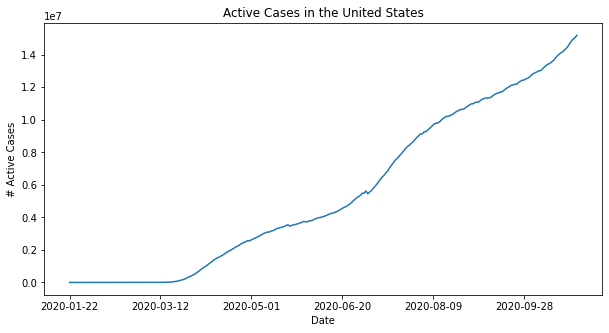

In [119]:
# for the US data, let's aggregate the number of active cases for a given date
active_cases_us = us_data.groupby('Date')['Active'].sum()

plt.figure(figsize=(10,5))
active_cases_us.plot()
plt.ylabel('# Active Cases')
plt.title('Active Cases in the United States')
plt.show()

As we can see, the number of cases has steadily been increasing.

### e) Which state has had it worst? Find the state with the most active cases in a single day

You will now perform another very important step when dealing with big data sets: **cleaning the data**.

Let's check the value of a specific row corresponding to the column with label `Province_State`:

In [ ]:
us_data['Province_State'][54779]

We should first remove the rows that do not have a meaningful value corresponding to `Province_State` (meaning, it is a data row that does not correspond to a state). We will remove the rows where (1) `Province_State` is `NAN` and (2) `Province_State` is `United States` (which has the combined states). For example, to get (1) you can use
```python
us_data[ us_data['Province_State'].notnull() ]
```

Define `us_states_data` which is a copy of `us_data` without the rows according to the description above.

In [197]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
us_states_data = us_data[us_data['Province_State'].notnull()].copy()
us_states_data = us_states_data[us_states_data['Province_State'] != 'United States'].copy()

Note the smaller number of rows in this view!

Now, using the dataframe `us_states_data`, group by `Province_State`, and get the `sum` corresponding to each column label. Store this dataframe as `us_group`.

In [210]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
#print(us_states_data)
us_group = us_states_data.groupby('Province_State').sum()
usa = us_states_data.groupby('Active').sum()
print(usa)

          People_Tested  Confirmed  Deaths  Recovered
Active                                               
-3487666            0.0          0       0    3487666
-3460455            0.0          0       0    3460455
-3422878            0.0          0       0    3422878
-3406656            0.0          0       0    3406656
-3375427            0.0          0       0    3375427
...                 ...        ...     ...        ...
 886341      17609179.0     903684   17343          0
 886708       7883440.0     904769   18061          0
 889238      17787885.0     906596   17358          0
 893052      17982829.0     910438   17386          0
 897428      18127049.0     914888   17460          0

[10548 rows x 4 columns]


Obtain the state with the largest total number of active cases. Store this in the variable `state_max_cases` (note your answer is a string). Store the corresponding largest total number of active cases as `max_cases`.

In [212]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
max_cases = max(us_group['Active'])
print(max_cases)
row = us_group[us_group['Active'] == max_cases]
print(row)
state_max_cases = "California"



83397939
                  Active  People_Tested  Confirmed   Deaths  Recovered
Province_State                                                        
California      83397939   1.454033e+09   85153910  1755895         76


In [214]:

# print(state_max_cases.groups)
# print(max_cases)

As an example of plots using pandas, take a look at the code snippet below:

['El Salvador' 'Sri Lanka' 'San Marino']


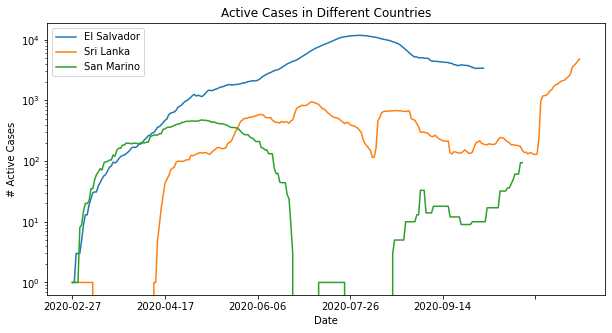

Province_State
Alabama             15092334
Alaska                697441
American Samoa             0
Arizona             23792936
Arkansas             7849898
                      ...   
Washington, D.C.           4
West Virginia        1424560
Wisconsin           11507473
Wuhan Evacuee              4
Wyoming               596183
Name: Active, Length: 68, dtype: int64


In [213]:
# pick 3 more countries and plot them all on the same plot
# since the code below selects 3 countries at random, 
# you can run it several times to see different plots
chosen_countries = np.random.choice(unique_countries,3)
print(chosen_countries)

# create an aggregated dataframe for each country and plot
plt.figure(figsize=(10,5))
for country in chosen_countries:
    country_data = covid_data[covid_data[labels[0]] == country]
    active_cases = country_data.groupby('Date')['Active'].sum()
    active_cases.plot(logy=True)

plt.ylabel('# Active Cases')
plt.title('Active Cases in Different Countries')
plt.legend(chosen_countries)
plt.show()
print(active_cases_us)

### f) Linear Least Squares Model

We want to create a simplistic model that will describe the number of active cases of coronavirus in the US. One simple model that we can use is linear regression. We will first approximate our data points using a straight line.

That is, we want to compute $m$ (slope) and $b$ (y-intercept) such that
$$
y_i = m x_i + b,
$$
where $(x_i,y_i)$ represents the day increment (days since the data collection started) and number of active cases on each day. We can write this in matrix form as
$$
\mathbf{Ac} \cong \mathbf{y}.
$$

where ${\bf c} = [m,b]$ is the least-squares solution. For now, we will use the data stored in `active_cases_us` computed above (this will define your array ${\bf y}$). For simplicity, we will define $x_i$ as $[0,1,2,3,4,...,n-1]$ where $n$ is the dimension of the array ${\bf y}$.

 **Construct the matrix A needed to compute m and b.**

In [272]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A = np.array([range(len(active_cases_us)),np.ones(len(active_cases_us))], float).T
print(A.shape[0])
A.T@A
A.T@active_cases_us

68


array([9.66763026e+09, 5.14269961e+08])

We will solve the linear least-squares using normal equations, i.e.:
$$
\mathbf{A^T A c} = \mathbf{A^T y}.
$$

**Using the normal equations, compute the slope and y-intercept.** Store the slope as `m` and the intercept as `b`.

In [280]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
#
import numpy.linalg as la
print()
a1 = A.T@A
y = A.T@active_cases_us
m,b = la.solve(a1,y)
#over

In [281]:
print(m,b)

-288598.4438485324 17230841.413043484


The last thing we want to do now is visualize how our model compares with the actual data.

**In a single plot, plot the model and the actual data for the number of active cases in the US.**

In [ ]:
active_cases = active_cases_us.values
n = active_cases.shape[0]
x = np.arange(n)

xs = np.linspace(np.min(x),np.max(x),num=1000)
ys = b + m*xs

plt.figure(figsize=(7,5))
plt.plot(xs,ys,label='Linear Model')
plt.plot(active_cases_us.values, 'o', label='Data')
plt.legend()
plt.ylabel('# of Active Cases')
plt.title('Active Cases in the United States')
plt.show()

Numpy includes a built-in function to compute the solution to a least squares problem. We can achieve the same result without using the normal equations using `np.linalg.lstsq()`. You can check it out!

You can now use your Pandas knoledge, and the linear least squares method, to create other visualizations and models using different metrics (`People_Tested`, `Confirmed`, ...) 